Para este trabajo utilizaremos la versión de Keras 2.1.2 con Theano de backend y Python 3

In [16]:
import keras
print(keras.__version__)

2.1.3


# Convolutional Neural Networks (CNN's)

Como resumen, las CNN's son multilayer-neural-networks pero que reciben como input imágenes. Estas redes se caracterizan por emular el funcionamiento de las neuronas encargadas del estímulo visual en seres vivos. Esta forma de proceder nos permite lograr grandes resultados con relativamente pocas neuronas. En una red neuronal totalmente conectada como las que se usan para problemas de clasificación de datos no es práctica para el reconocimiento de imágenes ya que necesitaríamos muchos más parámetros que optimizar. 

La *convolution operation* reduce el numero de parámetros libres, permitiendo a la red neuronal ser más profunda pero con menos parámetros.



#### Sus orígenes

Hubel and Wiesel en los años 50 se dieron cuenta de que el visual cortex de animales contenían neuronals que respondían individualmente a pequeñas regiones de campo visual. 
Los receptores y su tamaño varían a lo largo del cortex con el fin de formar el mapa del espacio visual

En 1968 se identificaron dos tipos de células básicas en el campo visual:

Células simples, que maximizan el detalle en sus respectivos campos perceptivos, y
Células complejas, que tienen campos perceptivos mayores y que no pueden ser localizadas en un sitio exacto. Su campo receptivo es principalmente la suma e intefración de los campos receptivos de varias células simples, 
si bien es cierto que reciben otros tipos de *inputs*


En 1990, LeNet fue una de las primeras CNN's que potenció el campo del Deep Learinig. Fue creada por Yann LeCun. En sus orígenes, esta arquitectura fue utilizada principalmente
para el reconocimineto de caracteres, lectura de códigos postales, números...

Actualmente se han desarrollado modelos bastante más potentes que este, pero la mayoría de ellos beben de los conceptos clave introducidos por este.
En la siguiente imagen se muestran gráficamente estos conceptos. La Red Neuronal que crearemos seguirá una estructura bastante parecida:


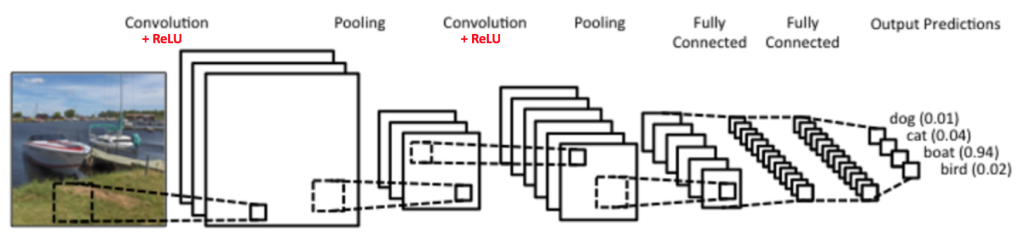

Se aprecia una primera etapa de convolución y una segunda etapa de neuronas completamente conectadas.

https://en.wikipedia.org/wiki/Convolutional_neural_network
https://en.wikipedia.org/wiki/Lateral_geniculate_nucleus
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

A partir del 2005 su implementación en GPUs se empezó a generalizar debido a sus buenos resultados. En 2011 varios *papers* introdujeron maneras de optimizar su implementación.
Se popularizaron grandes dataset sobre todo de imagenes donde las CNN's se mostraban especialmente potentes.

Será uno de estos datasets, el MNIST, sobre el que trabajaremos y usaremos para explicar este tipo de RRNN.
Usaremos como base varios proyectos de Github y tutoriales web, entre los que se encuentra https://elitedatascience.com/keras-tutorial-deep-learning-in-python

### 1. IMPORTAR MÓDULOS

Empezamos importando NumPy, fijando una semilla para hacer los ejemplos reproducibles e importanto los modulos de Keras corespondientes que utilizaremos en este ejemplo.



In [17]:
import numpy as np

In [18]:
np.random.seed(100218)  # for reproducibility
from keras.models import Sequential;

Los siguientes *layers* constituyen el core de Keras. Practicamente todas las RRNN utilizarán estas funciones.


In [19]:
from keras.layers import Dense, Dropout, Activation, Flatten

A contunuación importamos los *layers* específicos de las CNN's que nos permitirán construir estos modelos para el procesado óptimo de imágenes.


In [20]:

from keras.layers import Convolution2D, MaxPooling2D, Conv2D

Para acabar, importamos algunas utilidades que nos ayudarán a transformar los datos:


In [21]:
from keras.utils import np_utils

## 2. CARGA DE DATOS

Cagamos los datos del dataset de MNIST. Este datset contiene una gran cantidad de números escritos de diferentes formas, y ya nos viene dividido en conjunto de train y de test. Keras ya incluye este dataset por lo que lo importaremos directamente de ahí.



In [22]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Vemos la forma del dataset de train en X, que serán los píxeles de las imágenes:

In [23]:
print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


Y ahora la del dataset de train de Y, que nos muestra la etiqueta de que número es realmente. Vemos que hay 10 posibilidades de 0 a 9:

In [24]:
print (Y_train.shape)

(60000,)


Tenemoss por tanto 60000 muestras en el dataset de train, donde el X_train nos indica los 28x28 píxeles de la imágen mientras que el Y_train contiene el veerdadero número que se esconde detrás, vemos un valor cualquiera del **Y_train**:


In [25]:
print(Y_train[2]) # Parece indicarnos que la imagen debe ser un 4.

4


Y hacemos lo propio con el **X_train**, en primer lugar mostrando el valor de los píxeles de esa segunda obbservación que debe ser un 4:

In [26]:
X_train[2][1:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  

Y pasamos a graficarla, comprobando que correctamente es un 4:

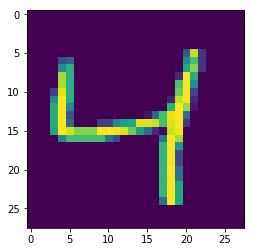

In [27]:
from matplotlib import pyplot as plt
plt.imshow(X_train[2])
plt.show()

Pintamos otro cualquiera:

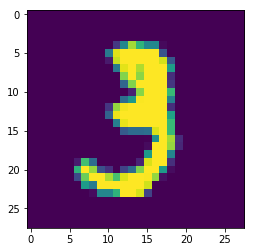

In [28]:
from matplotlib import pyplot as plt
plt.imshow(X_train[10])
plt.show()

## 3. PROCESADO DE LOS DATOS

#### X_Train

En este caso estamos usando Theano como *backend*, por lo que tienes que declarar las dimensiones y la profundidad de la imagen.
Por ejemplo una imagen con 3 RGB canales, tiene una profundidad de 3

Las imágenes del dataset que estamos utilizando tienen una única dimensión, cosa que también debemos declarar explícitamente.
Por  lo tanto, estamos convirtiendo nuestro dataset que tiene la forma  (n, width, height) a (n, depth, width, height). 

Procedemos a ello:

In [29]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

Para confirmar, pintamos las dimensiones de X_train de nuevo, y las comparamos con las que teníamos anterioremente:
(60000, 28, 28)

Observamos como se ha añadido la información de que trabajamos con 1 dimensión:


In [30]:
print (X_train.shape)


(60000, 1, 28, 28)


El paso final del preprocesado es convertir los datos a numéricos y normalzar los valores al rango [0,1] :  


In [31]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 

Estos datos ya están preparados para el modelado, veamos el Y_Train.

#### Y_Train

Vemos la forma de los datos del Y_train:


In [32]:
print (Y_train.shape)

(60000,)


Vemos como no tenemos las 10 diferentes clase de caracteres que deberíamos tener. Esto puede ser problemático. Ecemos un vistazo de nuevo a los datos del Y_train, como ya lo hemos hecho en el primer apartado.


In [33]:
print(Y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]

[5 0 4 1 9 2 1 3 1 4]


Los datos no estan divididos en 10 clases, sino que están representados por un array con los valores.
Lo arreglamos:

In [34]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

Comprobamos que se ha realizado correctamente. Debería salir (60000, 10) y los valores no haber cambiado. Se ha realizado correctamente:



In [35]:
print(Y_train.shape)
# (60000, 10)
print(Y_train[:10])

(60000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


## 4. DEFINIR LA ARQUITECTURA DEL MODELO

Pasamos por tanto ha definir el modelo. 
Dejamos una lista de ejemplos de implementación de diferentes modelos en Keras: https://github.com/keras-team/keras/tree/master/examples
En esta fase estableceremos el número de neuronas y de capas, así como las diferentes funciones de activación. En una fase posterior fijaremos la función de coste y los hiperparámetros.

Empezamos declarando un formato del modelos secuencial:

In [36]:
model = Sequential()

**¡AVISO!**
Determinadas versiones de Keras resultan problemáticas a la hora de fijar las dimensiones de la imagen. A modo de resumen, no le queda demasiado claro si trabajar con Theano o con TensorFlow. Por lo tanto debemos fijarle que usaremos Theano, con:

In [37]:
from keras import backend as K
K.set_image_dim_ordering('th')


Si el problema no se hubiese solucionardo, será necesario crear en la carpeta raiz del paquete Keras, un archivo keras.json con el siguiente contenido:

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "image_dim_ordering": "th",
    "backend": "theano"
}


Dicho esto, creamos ahora el *input layer*: Fijamos por tanto la forma del input y la función de activación que en este caso será la Relu (explicada en la introducción de este trabajo)

In [38]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))

Añadimos dos capas más a nuestro modelo, el **Pooling size** máximo y el **Dropout**. Pasamos a explicarlos ya que los consideramos conceptos clave:

- El Dropout consiste en la desconexión aleatoria de diferentes neuronas con el fin de evitar el *overfitting*. Es por tanto una forma de regularización. Puede ser vista también como una forma de *bagging* extremo, donde se generan redes neuronales distintas en cada iteración al descartar aleatoriamente determinadas neuronas.

- El Poopling Size en las reces convolucionales lo que nos hace es reducir la dimensionalidad del input, mejorando el overfitting y reduciendo el coste computacional. Abstrae la forma de la representación.
Mostramos  dos ejemplos:




https://www.quora.com/What-is-max-pooling-in-convolutional-neural-networks

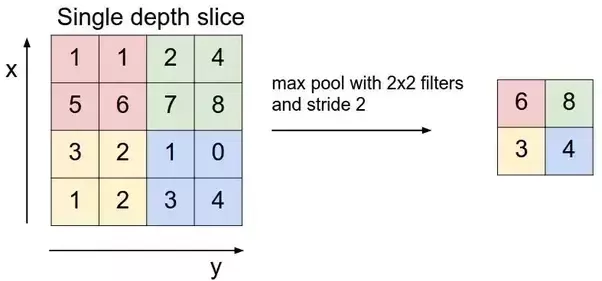

Un ejemplo más real:

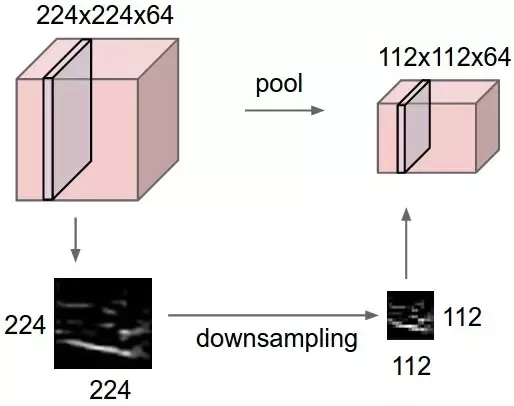

(Fuente: Github Stanford CS231n )

In [39]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Posteriormente, debemos especificar que los pesos de las capas convolucionales deben ser aplanados en 1 dimensión antes de pasarlos a los *fully connected layers*.


In [40]:
model.add(Flatten())

Añadimos el resto de capas que estarán completamente conectadas.

Con la capa **Dense** indicamos la función de activación y el número de outputs. Recordar que Keras maneja las conexiones entre capas y neuronas automáticamente. El output final tendrá tamaño 10 que corresponde a las 10 clases de dígitos.


In [41]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Con esto, ya tenemos la estructura de nuestra red neuronal preparada. Faltaría por tanto "compilar" el modelo y fijar los hiperparámetros.

## 5. PARAMETRIZACIÓN DEL MODELO

### LOSS FUNCTION Y OPTIMIZADOR

A la hora de compilar el modelo, paso previo a entrenar sobre el dataset, debemos fijar la función de coste y el optimizador.

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Keras ofrece una gran variedad de funciones de coste y optimizadores. 
Las principales *Loss Functions* que nos indicaran el error de la red y servirá para acer la *backward propagation* son:

- Mean squared error

mean_squared_error(y_true, y_pred)

- Mean absolute error

mean_absolute_error(y_true, y_pred)

- Mean absolute percentage error

mean_absolute_percentage_error(y_true, y_pred)

- Mean squared logarithmic error

mean_squared_logarithmic_error(y_true, y_pred)

- Squared hinge

squared_hinge(y_true, y_pred)

- Hinge

hinge(y_true, y_pred)

- Categorical hinge

categorical_hinge(y_true, y_pred)

- Logcosh

logcosh(y_true, y_pred)

En cuanto a los optimizadores, que se encargarán de hacer la optimización minimizando el error. Los que emos enccontrado como más utilizados de los que trae Keras son:

- **SGD** - Descenso del gradiente estocástico. En el puedes fijar el learning rate y el learning rate decay, así como el momentum y el Nesterov momentum.

keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

- **Adam** optimizer. Es una optimización estocástica propuesta por Diederik P. Kingma y Jimmy Lei Ba en su paper: *ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION* https://arxiv.org/pdf/1412.6980.pdf 
En este trabjao se proponen unos hiperparámetros tal y como los trae esta función por defento.

keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


### HIPERPARÁMETROS


Hasta este punto, en la definición de la arquitectura de nuestro modelo, ya hemos tenido que fijar determinados parámentros importantes como el Dropout, el Maxpooling o las funciones de activación. 

Nos queda por tanto establecer los hiperparámetros para ajustar el modelo. Plantearemos unos hiperparámetros iniciales en base a un razonamientro teórico, y luego se deberian de optimizar. Por lo tanto los hiperparámetros que consideraremos para optimizar son:

- batch_size (Tamaño del batch)
- nb_epoch (Número de epoch o veces que hace forward y backpropagation)
- lr (Learning rate)

## 6. AJUSTAR EL MODELO CON EL CONUNTO DE ENTRENAMIENTO

To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [43]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2679 - acc: 0.9179
Epoch 2/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1173 - acc: 0.9645
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0900 - acc: 0.9722
Epoch 4/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0752 - acc: 0.9773
Epoch 5/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0638 - acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0566 - acc: 0.9817
Epoch 7/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0484 - acc: 0.9845
Epoch 8/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0465 - acc: 0.9852
Epoch 9/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0432 - acc: 0.9859
Epoch 10/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0383 - acc: 0.9873

Hacemos un summmary para ver las características del modelo. Como hemos podido ver anteriormente, conforme se han ido realizando los epoch, la funcion de coste se ha ido minimizando llegando a casi estabilizrse.

In [44]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 13, 13)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 13, 13)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

## 7. EVALUACIÓN DEL MODELO EN EL CONJUNTO DE TEST

Para acabar, evaluamos el resultado de nuestro modelo.

In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [50]:
score

[0.039333470196881902, 0.98880000000000001]

In [47]:
print("Loss function", score[0])
print("Accuracy", score[1])

Loss function 0.0393334701969
Accuracy 0.9888


Con esta explicación acabamos nuestra introducción a las redes neuronales que trata de mostrar nuestros primeros pasos profundizando en el uso de las RRNN. Desde la explicación teórica más básica se ha ido desarrollando un recorrido en primer lugar por la estructura básica de las redes, el funcionamiento de los elementos principales de la librería Keras, para acabar con esta explicación del tratamiento de datos en problemas de clasificación cuando estos son imágenes.

Entendemos que sin grandes alardes, dada la complejidad de la materia, pero de una manera clara y efectiva hemos realizado este repaso que esperamos quwe guste a sus lectores.